<a href="https://colab.research.google.com/github/trnq-eu/ml-zoomcamp-2024/blob/main/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Classification

## 3.1 Churn prediction


https://github.com/DataTalksClub/machine-learning-zoomcamp/tree/master/03-classification

## 3.2 Data preparation

https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-03-churn-prediction/03-churn.ipynb

Data from https://www.kaggle.com/blastchar/telco-customer-churn



In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'


In [ ]:
!wget $data

--2024-09-23 03:35:21--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’

WA_Fn-UseC_-Telco-C 100%[===================>] 954.59K  --.-KB/s    in 0.06s   

2024-09-23 03:35:21 (16.2 MB/s) - ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’ saved [977501/977501]



In [ ]:
data_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
df = pd.read_csv(data_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
# sistemazione delle colonne per rimpiazzare spazi e rendere tutto minuscolo

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
  df[c] = df[c].str.lower().str.replace(' ', '_')

categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [ ]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [ ]:
df.dtypes

,0
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


In [ ]:
# provo a convertire la colonna in numeri ma fallisco perché ci sono stringhe
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [ ]:
tc.isnull().sum()

11

In [ ]:
# voglio vedere gli id di tutti i clienti che hanno totalcharges nullo
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [ ]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [ ]:
df.totalcharges = df.totalcharges.fillna(0)

In [ ]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [ ]:
df.isnull().sum()

,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [ ]:
# rimpiazzo sì e no con 0 e 1

df.churn = (df.churn == 'yes').astype(int)

In [ ]:
df.churn

,churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


## 3.3 Setting up the validation framework

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
len(df_full_train), len(df_test)

(5634, 1409)

In [ ]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [ ]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [ ]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.isnull().sum()


,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [ ]:
df_full_train.churn.value_counts()

,count
churn,
0,4113
1,1521


In [ ]:
# vedo il churn rate in percentuale
df_full_train.churn.value_counts(normalize=True)

,proportion
churn,
0,0.730032
1,0.269968


In [ ]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [ ]:
df_full_train.dtypes

,0
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


In [ ]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [ ]:
df_full_train[categorical].nunique()

,0
gender,2
seniorcitizen,2
partner,2
dependents,2
phoneservice,2
multiplelines,3
internetservice,3
onlinesecurity,3
onlinebackup,3
deviceprotection,3


## 3.5 Feature importance: churn rate and risk ratio

In [ ]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [ ]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()

churn_female

0.27682403433476394

In [ ]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()

churn_male

0.2632135306553911

In [ ]:
df_full_train.partner.value_counts()

,count
partner,
no,2932
yes,2702


In [ ]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [ ]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [ ]:
global_churn - churn_partner

0.06493474245795922

In [ ]:
global_churn - churn_no_partner

-0.05984095297455855

Risk ratio

Risk = group / global

Se risk > 1 è più probabile il churn

In [ ]:
churn_no_partner / global_churn

1.2216593879412643

In [ ]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [ ]:
from IPython.display import display

In [ ]:
for c in categorical:
  df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
  df_group['diff'] = df_group['mean'] - global_churn
  df_group['risk'] = df_group['mean'] / global_churn
  display(df_group)
  print()
  print()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature importance: Mutual information

Informazione sulla dipendenza reciproca tra due variabili

In [ ]:
from sklearn.metrics import mutual_info_score

mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [ ]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [ ]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [ ]:
def mutual_info_churn_score(series):
  return mutual_info_score(series, df_full_train.churn)

In [ ]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False )

,0
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


## 3.7 Feature importance: Correlation

Coefficiente di correlazione. Quando la correlazione è positiva, se una variabile cresce, cresce anche l'altra.

Vale per i valori numerici.



In [ ]:
df_full_train.tenure.max()

72

In [ ]:
numerical = df_full_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical

['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn']

In [ ]:
numerical.remove('churn')

In [ ]:
categorical = df_full_train.select_dtypes(include=['object']).columns.tolist()
categorical

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [ ]:
# ottengo i coefficienti di correlazione
df_full_train[numerical].corrwith(df_full_train.churn)

,0
seniorcitizen,0.141966
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [ ]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [ ]:
df_full_train[df_full_train.tenure >= 5].churn.mean()

0.2083692838654012

In [ ]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [ ]:
df_full_train[(df_full_train.monthlycharges <= 20) & df_full_train.monthlycharges <= 15].churn.mean()

0.26996805111821087

## 3.8 One-hot encoding

In [ ]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train[categorical + numerical].to_dict(orient='records')


In [ ]:
dv = DictVectorizer(sparse=False)

In [ ]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [ ]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [ ]:
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [ ]:
X_train = dv.transform(train_dicts)

In [ ]:
X_train.shape

(4225, 45)

In [ ]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [ ]:
X_val = dv.transform(val_dicts)

In [ ]:
X_val.shape

(1409, 45)

## 3.9 Logistic regression

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
z = np.linspace(-5, 5, 51)

In [ ]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

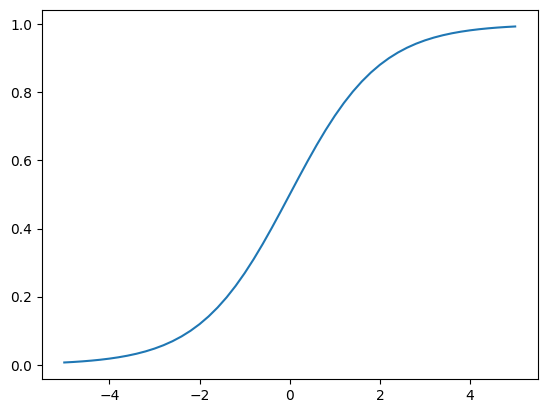

In [ ]:
plt.plot(z, sigmoid(z))

In [ ]:
# def linear_regression(xi):
#   result = w0

#   for j in range(len(w)):
#     result = result + xi[j] * w[j]

#   return result

In [ ]:
# def logistic_regression(xi):
#   score = w0

#   for j in range(len(w)):
#     score = score + xi[j] * w[j]

#   result = sigmoid(score)
#   return result

## 3.10 Training logistic regression with Scikit Learn

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.029, -0.079,  0.063, -0.089, -0.082,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.01 ,  0.063, -0.089, -0.082,  0.266, -0.089, -0.285, -0.232,
        0.124, -0.165,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.233, -0.071,  0.   ])

In [ ]:
model.predict_proba(X_train)

array([[0.90408388, 0.09591612],
       [0.32082768, 0.67917232],
       [0.36653226, 0.63346774],
       ...,
       [0.47050481, 0.52949519],
       [0.95767208, 0.04232792],
       [0.3012503 , 0.6987497 ]])

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]

In [ ]:
churn_decision = (y_pred >= 0.5)

In [ ]:
df_val[churn_decision].customerid

,customerid
3,8433-wxgna
8,3440-jpscl
11,2637-fkfsy
12,7228-omtpn
19,6711-fldfb
...,...
1397,5976-jcjrh
1398,2034-cgrhz
1399,5276-kqwhg
1407,6521-yytyi


In [ ]:
churn_decision = (y_pred >= 0.5)

In [ ]:
(y_val == churn_decision).mean()

0.8034066713981547

In [ ]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [ ]:
df_pred

,probability,prediction,actual,correct
0,0.008898,0,0,True
1,0.204770,0,0,True
2,0.212755,0,0,True
3,0.542723,1,1,True
4,0.214325,0,0,True
...,...,...,...,...
1404,0.311716,0,0,True
1405,0.039014,0,1,False
1406,0.135674,0,0,True
1407,0.799371,1,1,True


In [ ]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

## 3.11 Model interpretation

In [ ]:
list(dv.get_feature_names_out())

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [ ]:
dict(zip(list(dv.get_feature_names_out()), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.029,
 'dependents=yes': -0.079,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.082,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.336,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.01,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.082,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.285,
 'paperlessbilling=no': -0.232,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.165,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [ ]:
small = ['contract', 'tenure', 'monthlycharges']

In [ ]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [ ]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_train[small].to_dict(orient='records')

In [ ]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [ ]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [ ]:
X_train_small = dv_small.transform(dicts_train_small)
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [ ]:
w0 = model_small.intercept_[0]
w0

-2.4767756620596773

In [ ]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [ ]:
f_names = list(dv_small.get_feature_names_out())

dict(zip(f_names, w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

## 3.11 Using the model

In [ ]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dicts_full_train[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'two_year',
 'paperlessbilling': 'no',
 'paymentmethod': 'mailed_check',
 'tenure': 12,
 'monthlycharges': 19.7,
 'totalcharges': 258.35}

In [ ]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [ ]:
y_full_train = df_full_train.churn.values

In [ ]:
model = LogisticRegression().fit(X_full_train,y_full_train)
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [ ]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)


In [ ]:
y_pred = model.predict_proba(X_test)[:, 1]
churn_decision = (y_pred >= 0.5)

In [ ]:
(churn_decision == y_test).mean()

0.815471965933286

In [ ]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [ ]:
X_small = dv.transform([customer])

In [ ]:
X_small = dv.transform([customer])

In [ ]:
model.predict_proba(X_small)[0,1]

0.405681097787929

In [ ]:
y_test[10]

0

## Homework 2023

https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/03-classification/homework.md

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2024-09-23 03:35:34--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.07s   

2024-09-23 03:35:35 (21.3 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [ ]:
import pandas as pd

df = pd.read_csv("/content/data.csv")

In [ ]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
categories = ['Make', 'Model', 'Year', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Vehicle Size',
       'highway MPG', 'city mpg', 'MSRP']

In [ ]:
df = df[categories]
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Size,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,34500


In [ ]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [ ]:
df.fillna(0, inplace=True)
df.isnull().sum()

,0
make,0
model,0
year,0
engine_hp,0
engine_cylinders,0
transmission_type,0
vehicle_size,0
highway_mpg,0
city_mpg,0
msrp,0


In [ ]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_size,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,34500


In [ ]:
df.columns = df.columns.str.replace('msrp', 'price')

In [ ]:
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_size', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

### Question 1

What is the most frequent observation (mode) for the column transmission_type?

In [ ]:
df.transmission_type.mode()

,transmission_type
0,AUTOMATIC


In [ ]:
df.transmission_type.value_counts()

,count
transmission_type,
AUTOMATIC,8266
MANUAL,2935
AUTOMATED_MANUAL,626
DIRECT_DRIVE,68
UNKNOWN,19


### Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

In [ ]:
df.dtypes

,0
make,object
model,object
year,int64
engine_hp,float64
engine_cylinders,float64
transmission_type,object
vehicle_size,object
highway_mpg,int64
city_mpg,int64
price,int64


In [ ]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']

In [ ]:
corr_matrix = df[numerical].corr()
corr_matrix

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


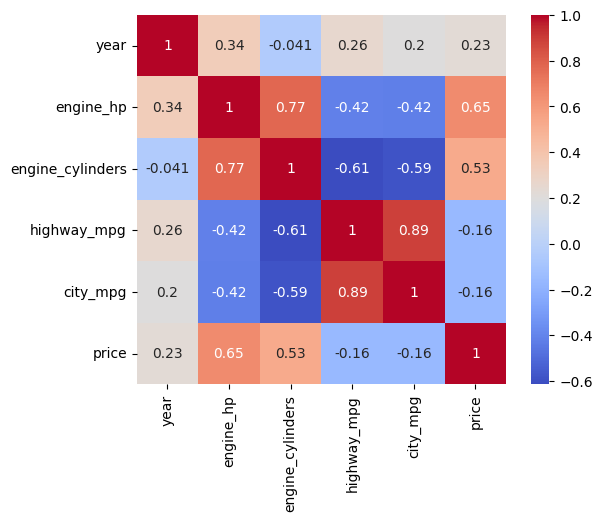

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()


**Make price binary**

- Now we need to turn the price variable from numeric into a binary format.

- Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe

In [ ]:
mean_price = df['price'].mean()
mean_price

40594.737032063116

In [ ]:
df['above_average'] = (df['price'] > mean_price).astype(int)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_size,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Compact,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,34500,0


### Split the data

Split your data in train/val/test sets with 60%/20%/20% distribution.

Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.

Make sure that the target value (above_average) is not in your dataframe.

In [ ]:
from sklearn.model_selection import train_test_split

df2 = df.copy()

df2.drop(['price'], axis=1)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_size,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Compact,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,Midsize,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,Midsize,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,Midsize,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,Midsize,23,16,1


In [ ]:
SEED = 42
df_full_train, df_test = train_test_split(df2, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=SEED)

assert len(df2) == (len(df_train) + len(df_val) + len(df_test))

In [ ]:
len(df_train), len(df_val), len(df_test)


(7624, 1907, 2383)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

### Question 3

- Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).

In [ ]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['make', 'model', 'transmission_type', 'vehicle_size']

In [ ]:
from sklearn.metrics import mutual_info_score

mutual_info_score(df_train.make, y_train)

0.24011387388692013

In [ ]:
mutual_info_score(df_train.model, y_train)

0.4605138967073621

In [ ]:
mutual_info_score(df_train.transmission_type, y_train)

0.021262108308466574

In [ ]:
mutual_info_score(df_train.vehicle_size, y_train)

0.04018253527871374

**Answer**: transmission type has the lowest mutual information score

### Question 4

- Now let's train a logistic regression.

- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.

- Fit the model on the training dataset.
 - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
 - model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

In [ ]:
df2 = df.copy()

df2.drop(['price'], axis=1)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_size,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Compact,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,Midsize,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,Midsize,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,Midsize,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,Midsize,23,16,1


In [ ]:
df2 = pd.get_dummies(df2, columns=categorical, drop_first=True, dtype=int)


In [ ]:
# one-hot encoding with pandas

df2.head()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price,above_average,make_Alfa Romeo,make_Aston Martin,make_Audi,...,model_tC,model_xA,model_xB,model_xD,transmission_type_AUTOMATIC,transmission_type_DIRECT_DRIVE,transmission_type_MANUAL,transmission_type_UNKNOWN,vehicle_size_Large,vehicle_size_Midsize
0,2011,335.0,6.0,26,19,46135,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2011,300.0,6.0,28,19,40650,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2011,300.0,6.0,28,20,36350,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2011,230.0,6.0,28,18,29450,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2011,230.0,6.0,28,18,34500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
SEED = 42
df_full_train, df_test = train_test_split(df2, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df2) == (len(df_train) + len(df_val) + len(df_test))

In [ ]:
len(df_train), len(df_val), len(df_test)


(7148, 2383, 2383)

In [ ]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [ ]:

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)


df_train = df_train.drop('price', axis=1)
df_val = df_val.drop('price', axis=1)
df_test = df_test.drop('price', axis=1)

assert 'above_average' not in df_train.columns
assert 'above_average' not in df_val.columns
assert 'above_average' not in df_test.columns

In [ ]:
df_train.columns

Index(['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
       'make_Alfa Romeo', 'make_Aston Martin', 'make_Audi', 'make_BMW',
       'make_Bentley',
       ...
       'model_tC', 'model_xA', 'model_xB', 'model_xD',
       'transmission_type_AUTOMATIC', 'transmission_type_DIRECT_DRIVE',
       'transmission_type_MANUAL', 'transmission_type_UNKNOWN',
       'vehicle_size_Large', 'vehicle_size_Midsize'],
      dtype='object', length=972)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=SEED)
model.fit(df_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
y_pred = model.predict(df_val)

In [ ]:
import numpy as np
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.94


In [ ]:
df_train

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,...,model_tC,model_xA,model_xB,model_xD,transmission_type_AUTOMATIC,transmission_type_DIRECT_DRIVE,transmission_type_MANUAL,transmission_type_UNKNOWN,vehicle_size_Large,vehicle_size_Midsize
0,2011,225.0,6.0,19,15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2009,276.0,6.0,21,17,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2012,570.0,10.0,20,12,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2016,200.0,4.0,27,20,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2009,158.0,4.0,26,20,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7143,2016,266.0,6.0,25,18,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7144,2009,260.0,4.0,29,21,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7145,2012,260.0,6.0,22,17,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7146,1993,136.0,4.0,26,19,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### tentativo 2

In [ ]:
df2 = df.copy()

df2.drop(['price'], axis=1)

SEED = 42

df_full_train, df_test = train_test_split(df2, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

df_train = df_train.drop('price', axis=1)
df_val = df_val.drop('price', axis=1)
df_test = df_test.drop('price', axis=1)

assert 'above_average' not in df_train.columns
assert 'above_average' not in df_val.columns
assert 'above_average' not in df_test.columns



In [ ]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_size,highway_mpg,city_mpg
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,Midsize,19,15
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,Midsize,21,17
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Compact,20,12
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Compact,27,20
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,Compact,26,20


In [ ]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
train_dict[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'vehicle_size': 'Midsize',
 'highway_mpg': 19,
 'city_mpg': 15}

In [ ]:
X_train = dv.fit_transform(train_dict)

In [ ]:
X_train

array([[1.500e+01, 6.000e+00, 2.250e+02, ..., 0.000e+00, 1.000e+00,
        2.011e+03],
       [1.700e+01, 6.000e+00, 2.760e+02, ..., 0.000e+00, 1.000e+00,
        2.009e+03],
       [1.200e+01, 1.000e+01, 5.700e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       ...,
       [1.700e+01, 6.000e+00, 2.600e+02, ..., 0.000e+00, 1.000e+00,
        2.012e+03],
       [1.900e+01, 4.000e+00, 1.360e+02, ..., 0.000e+00, 0.000e+00,
        1.993e+03],
       [1.700e+01, 6.000e+00, 3.650e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

In [ ]:
model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=SEED)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [ ]:

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.94


### Question 5

Let's find the least useful feature using the feature elimination technique.

Train a model with all these features (using the same parameters as in Q4).

Now exclude each feature from this set and train a model without it.

Record the accuracy for each model.

For each feature, calculate the difference between the original accuracy and the accuracy without the feature.


Soluzione:

- elenco delle feature
- crea un dataframe dei punteggi con: nome della feature eliminata, accuracy, differenza rispetto all'accuracy iniziale
- ciclo: per ogni feature crea un subset dal quale rimuovi quella feature e riaddestra il modello

In [ ]:
import pandas as pd
import numpy as np

df2 = df.copy()


mean_price = 40594.737032063116


In [ ]:
df2['above_average'] = (df2['price'] > mean_price).astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

df2.drop(['price'], axis=1)


SEED = 42

df_full_train, df_test = train_test_split(df2, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

df_train = df_train.drop('price', axis=1)
df_val = df_val.drop('price', axis=1)
df_test = df_test.drop('price', axis=1)

assert 'above_average' not in df_train.columns
assert 'above_average' not in df_val.columns
assert 'above_average' not in df_test.columns

assert 'price' not in df_train.columns
assert 'price' not in df_val.columns
assert 'price' not in df_test.columns

In [ ]:
accuracy = 0.94

initial_score = accuracy
features = df_train.columns.to_list()
features

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_size',
 'highway_mpg',
 'city_mpg']

Tolgo **make**:

In [ ]:
# rimuovo make
make_less = features.copy()
make_less.remove('make')
make_less

['model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_size',
 'highway_mpg',
 'city_mpg']

In [ ]:
from sklearn.feature_extraction import DictVectorizer


# creo il dictvectorizer
dv0 = DictVectorizer(sparse=False)
train_dict = df_train[make_less].to_dict(orient='records')
train_dict[0]

{'model': 'Endeavor',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'vehicle_size': 'Midsize',
 'highway_mpg': 19,
 'city_mpg': 15}

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train = dv0.fit_transform(train_dict)
model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=SEED)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score # import the missing function

val_dict = df_val[make_less].to_dict(orient='records')
X_val = dv0.transform(val_dict)

y_pred = model.predict(X_val)

make_less_accuracy = np.round(accuracy_score(y_val, y_pred))
print(f'Make-less accuracy = {make_less_accuracy}')

Make-less accuracy = 1.0


In [ ]:
# creo un dizionario per tenere traccia dei risultati
results_df = pd.DataFrame(columns=['feature_less', 'accuracy', 'difference'])

results_df.loc[len(results_df)] = ['make_less', make_less_accuracy, accuracy - make_less_accuracy]

results_df

,feature_less,accuracy,difference
0,make_less,1.0,-0.06


Tolgo **model**:

In [ ]:
model_less = features.copy()
model_less.remove('model')

dv = DictVectorizer(sparse=False)
model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=SEED)

train_dict = df_train[model_less].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
model.fit(X_train, y_train)
val_dict = df_val[model_less].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)
model_less_accuracy = np.round(accuracy_score(y_val, y_pred))
results_df.loc[len(results_df)] = ['model_less', model_less_accuracy, accuracy - model_less_accuracy]
results_df




,feature_less,accuracy,difference
0,make_less,1.0,-0.06
1,model_less,1.0,-0.06


Tolgo **year**:

In [ ]:
year_less = features.copy()
year_less.remove('year')

# Reinizializza DictVectorizer e il modello
dv = DictVectorizer(sparse=False)
model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=SEED)

train_dict = df_train[year_less].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
model.fit(X_train, y_train)

val_dict = df_val[year_less].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

year_less_accuracy = np.round(accuracy_score(y_val, y_pred), 3)
results_df.loc[len(results_df)] = ['year_less', year_less_accuracy, accuracy - year_less_accuracy]

In [ ]:
results_df

,feature_less,accuracy,difference
0,make_less,1.000,-0.060
1,model_less,1.000,-0.060
2,year_less,0.945,-0.005


Tolgo **engine_hp**:

In [ ]:
enginehp_less = features.copy()
enginehp_less.remove('engine_hp')

# Reinizializza DictVectorizer e il modello
dv = DictVectorizer(sparse=False)
model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=SEED)

train_dict = df_train[enginehp_less].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
model.fit(X_train, y_train)

val_dict = df_val[enginehp_less].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

enginehp_less_accuracy = np.round(accuracy_score(y_val, y_pred))
results_df.loc[len(results_df)] = ['enginehp_less_accuracy', enginehp_less_accuracy, accuracy - enginehp_less_accuracy]

In [ ]:
results_df

,feature_less,accuracy,difference
0,make_less,1.000,-0.060
1,model_less,1.000,-0.060
2,year_less,0.945,-0.005
3,enginehp_less_accuracy,1.000,-0.060


In [ ]:
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)

    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=SEED)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)

    scores.loc[len(scores)] = [feature, score, original_score - score]

In [ ]:
scores

,eliminated_feature,accuracy,difference
0,make,0.892572,0.047428
1,model,0.912295,0.027705
2,year,0.944608,-0.004608
3,engine_hp,0.922786,0.017214
4,engine_cylinders,0.942509,-0.002509
5,transmission_type,0.936634,0.003366
6,vehicle_size,0.932018,0.007982
7,highway_mpg,0.941251,-0.001251
8,city_mpg,0.942509,-0.002509


In [ ]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_size,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Compact,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,34500,0


### Question 6

For this question, we'll see how to use a linear regression model from Scikit-Learn.

We'll need to use the original column price. Apply the logarithmic transformation to this column.

Fit the Ridge regression model on the training data:
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = Ridge(alpha=a, solver="sag", random_state=42)

This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]

Which of these alphas leads to the best RMSE on the validation set?

Round your RMSE scores to 3 decimal digits.
If there are multiple options, select the smallest alpha.

In [ ]:
df4 = df.copy()
df4.drop('above_average', axis=1, inplace=True)
df4.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_size,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,34500


In [ ]:
# applico la trasformazione logaritmica al prezzo
df4['price_log'] = np.log1p(df['price'])
df4.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_size,highway_mpg,city_mpg,price,price_log
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Compact,26,19,46135,10.739349
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,19,40650,10.612779
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,20,36350,10.500977
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,29450,10.290483
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,34500,10.448744


In [ ]:
df4.drop('price', axis=1, inplace=True)


In [ ]:
df4.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_size,highway_mpg,city_mpg,price_log
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Compact,26,19,10.739349
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,19,10.612779
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,20,10.500977
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,10.290483
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,10.448744


In [ ]:
SEED = 42

In [ ]:
df4_full_train, df4_test = train_test_split(df4, test_size = 0.2, random_state=SEED)
df4_train, df4_val = train_test_split(df4_full_train, test_size = 0.25, random_state=SEED)

In [ ]:
df4_train = df4_train.reset_index(drop=True)
df4_test = df4_test.reset_index(drop=True)
df4_val = df4_val.reset_index(drop=True)

In [ ]:
y_train = df4_train.price_log.values
y_val = df4_val.price_log.values
y_test = df4_test.price_log.values

In [ ]:
df4_train = df4_train.drop('price_log', axis=1)
df4_test = df4_test.drop('price_log', axis=1)
df4_val = df4_val.drop('price_log', axis=1)

assert 'price_log' not in df4_train.columns
assert 'price_log' not in df4_test.columns
assert 'price_log' not in df4_test.columns

assert 'price' not in df4_train.columns
assert 'price' not in df4_test.columns
assert 'price' not in df4_test.columns


In [ ]:
y_train.shape, y_val.shape

((7148,), (2383,))

In [ ]:
dv = DictVectorizer(sparse=False)
train_dict = df4_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df4_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
X_train

array([[1.500e+01, 6.000e+00, 2.250e+02, ..., 0.000e+00, 1.000e+00,
        2.011e+03],
       [1.700e+01, 6.000e+00, 2.760e+02, ..., 0.000e+00, 1.000e+00,
        2.009e+03],
       [1.200e+01, 1.000e+01, 5.700e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       ...,
       [1.700e+01, 6.000e+00, 2.600e+02, ..., 0.000e+00, 1.000e+00,
        2.012e+03],
       [1.900e+01, 4.000e+00, 1.360e+02, ..., 0.000e+00, 0.000e+00,
        1.993e+03],
       [1.700e+01, 6.000e+00, 3.650e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

In [ ]:
from sklearn.linear_model import Ridge

scores = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
  model = Ridge(alpha=alpha, solver='sag', random_state=SEED)
